In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/data (6).csv')

/Users/olebogeng/anaconda3/envs/DATA-ENRICHMENT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olebogeng/anaconda3/envs/DATA-ENRICHMENT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


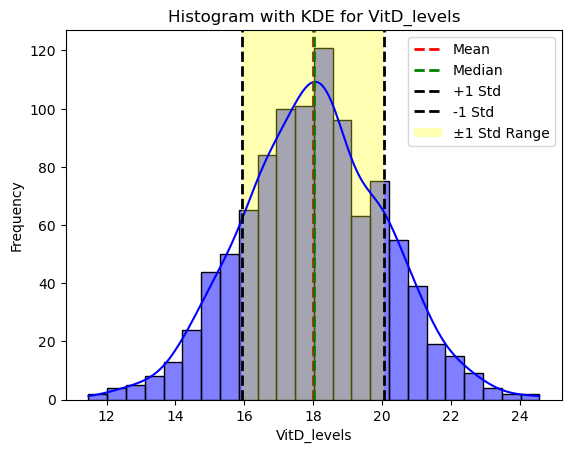

/Users/olebogeng/anaconda3/envs/DATA-ENRICHMENT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olebogeng/anaconda3/envs/DATA-ENRICHMENT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


VitD_levels is Continuous.
VitD_levels has a negative skew.
VitD_levels displays Leptokurtic kurtosis.


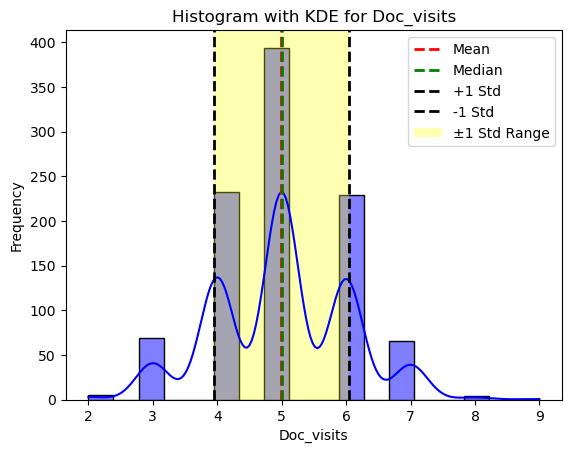

Doc_visits is Discrete.
Doc_visits has a positive skew.
Doc_visits displays Platykurtic kurtosis.


/Users/olebogeng/anaconda3/envs/DATA-ENRICHMENT/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olebogeng/anaconda3/envs/DATA-ENRICHMENT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


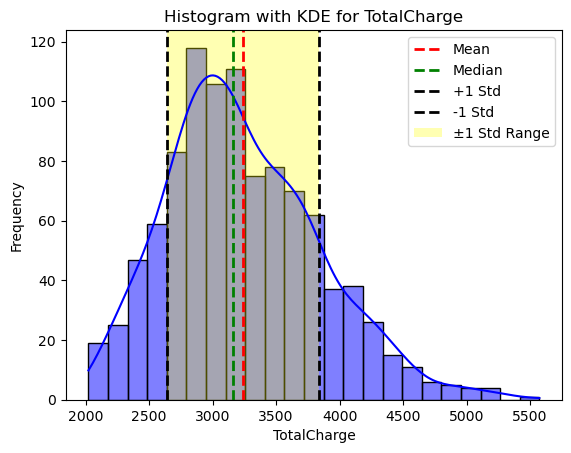

TotalCharge is Continuous.
TotalCharge has a positive skew.
TotalCharge displays Leptokurtic kurtosis.


In [4]:
# List of features to analyze
features = ['VitD_levels', 'Doc_visits', 'TotalCharge']

for feature in features:
    # Create a figure with subplots
    fig, ax = plt.subplots()

    # Plot the histogram with kde
    sns.histplot(df[feature], kde=True, ax=ax, color='blue')

    # Add a line for the mean (red)
    ax.axvline(df[feature].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

    # Add a line for the median (green)
    ax.axvline(df[feature].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

    # Add lines for +1 and -1 std from the mean (black)
    ax.axvline(df[feature].mean() + df[feature].std(), color='black', linestyle='dashed', linewidth=2, label='+1 Std')
    ax.axvline(df[feature].mean() - df[feature].std(), color='black', linestyle='dashed', linewidth=2, label='-1 Std')

    # Highlight the range between +1 and -1 std (yellow)
    ax.axvspan(df[feature].mean() - df[feature].std(), df[feature].mean() + df[feature].std(), facecolor='yellow', alpha=0.3, label='±1 Std Range')

    # Set plot title and labels
    ax.set_title(f'Histogram with KDE for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()

    # Print answers to questions:
    #1 Is it Discrete or Continuous?
    print(f"{feature} is { 'Discrete' if df[feature].dtype == 'int64' else 'Continuous' }.")
    #2 Does it have a skew? If so, which direction (+/-)
    print(f"{feature} has a {'positive' if df[feature].skew() > 0 else 'negative' if df[feature].skew() < 0 else 'no'} skew.")
    #3 What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    # if the kurtosis value is close to 0, you would describe it as Mesokurtic. If it's significantly positive, you would describe it as Leptokurtic, and if it's significantly negative, you would describe it as Platykurtic
    print(f"{feature} displays {'Mesokurtic' if df[feature].kurt() == 0 else 'Leptokurtic' if df[feature].kurt() > 0 else 'Platykurtic'} kurtosis.")